# Test the VGG16 Transfer Learning Bottleneck Features

In [1]:
import numpy as np
from glob import glob

files = np.load("bottleneck_features.npz")
# retrieve dataset and labels from file
dataset, targets = files["data"], files["targets"]
print("dataset shape = {}".format(dataset.shape))
# shape is (# images,7,7,512) --> 7,7,512 is the output shape of the VGG16 convolutional layers

dataset shape = (4026, 7, 7, 512)


In [2]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.layers import GlobalMaxPooling2D

# start creating a neural network
model = Sequential()
# add an input layer that takes in the bottleneck featuress
model.add(Flatten(input_shape=(7, 7, 512)))
# create a 100 unit (# neurons in layer)
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
# output the probability of being in class 1 or class 2
model.add(Dense(1, activation='sigmoid'))
# create the model using a binary loss function, optimised using rmsprop (https://keras.io/optimizers/#rmsprop)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])
# show model architecture
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2508900   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,509,921
Trainable params: 2,509,921
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='vgg16.weights.best.hdf5', verbose=0, 
                               save_best_only=True)
# epochs is number of times the entire dataset is run through the model
# batch_size is how many images are run through the model at a time. 
#    There are multiple batches per epoch to get through all the images 
# validation_split is the proportion of data that your model is validated on automatically by keras
#    play around with this to make sure there is a good balance between 'acc' and 'val_acc' 
#    (which are values between 0 and 1 indicating accuracy)
# callbacks calls the checkpointer above to save the best weights
# verbose logs the output
# shuffle makes sure the order the images 'go through' the model is pseudo-randomised to add robustness 
history = model.fit(dataset, targets, epochs=10, batch_size=64, validation_split=0.25, 
          callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 3019 samples, validate on 1007 samples
Epoch 1/10
3019/3019 [==============================] - 2s - loss: 0.5292 - acc: 0.7705 - val_loss: 1.2768 - val_acc: 0.0000e+00
Epoch 2/10
3019/3019 [==============================] - 1s - loss: 0.3390 - acc: 0.8824 - val_loss: 1.3996 - val_acc: 0.5194
Epoch 3/10
3019/3019 [==============================] - 1s - loss: 0.2954 - acc: 0.9033 - val_loss: 1.4752 - val_acc: 0.4886
Epoch 4/10
3019/3019 [==============================] - 1s - loss: 0.2670 - acc: 0.9218 - val_loss: 1.2276 - val_acc: 0.5968
Epoch 5/10
3019/3019 [==============================] - 0s - loss: 0.2543 - acc: 0.9261 - val_loss: 1.3471 - val_acc: 0.5859
Epoch 6/10
3019/3019 [==============================] - 0s - loss: 0.2321 - acc: 0.9400 - val_loss: 1.3701 - val_acc: 0.5869
Epoch 7/10
3019/3019 [==============================] - 0s - loss: 0.2230 - acc: 0.9434 - val_loss: 0.6239 - val_acc: 0.9662
Epoch 8/10
3019/3019 [==============================] - 0s - loss: 0.2027

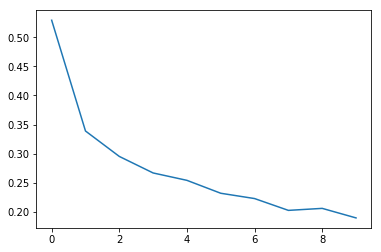

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(history.history['loss'])

### Load the best weights

In [5]:
# load the weights that yielded the best validation accuracy
model.load_weights('vgg16.weights.best.hdf5')

### Determine Accuracy  (this won't run until the bottleneck_features_test.npz file is available)

In [6]:
test_files = np.load("bottleneck_features_test.npz")

test_dataset, test_targets = test_files["data"], test_files["targets"]
print("test_dataset shape = {}".format(test_dataset.shape))
test_predictions = model.predict(test_dataset)
correct=0
for i,prediction in enumerate(test_predictions):
    prediction = 0 if prediction>0.5 else 1
    if prediction==test_targets[i]:
        correct+=1
print("SCORE = {}".format(correct*100/len(test_targets)))

test_dataset shape = (1650, 7, 7, 512)
SCORE = 44.96969696969697


In [ ]:
print("YOU'RE DONE!")